In [3]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path.cwd().resolve().parent
sys.path.insert(0, str(project_root))

from src.config import LABELS, FEATURES_BASELINE, FEATURES_ENRICHED
from src.data_loader import load_and_split

In [4]:
data_path = project_root / "data" / "clean" / "final_dataset1.csv"
df = pd.read_csv(data_path)
train_df, test_df = load_and_split(data_path)

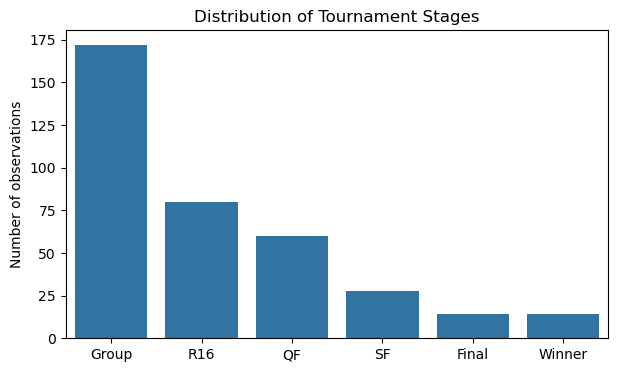

In [5]:
counts = df["y_ord"].value_counts().sort_index()

plt.figure(figsize=(7,4))
sns.barplot(x=LABELS, y=counts.values)
plt.title("Distribution of Tournament Stages")
plt.ylabel("Number of observations")
plt.show()

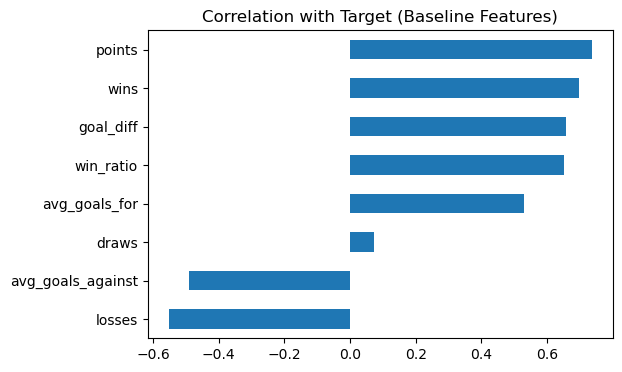

In [6]:
corr_base = df[FEATURES_BASELINE + ["y_ord"]].corr(numeric_only=True)["y_ord"]
corr_base = corr_base.drop("y_ord").sort_values()

corr_base.plot(kind="barh", figsize=(6,4))
plt.title("Correlation with Target (Baseline Features)")
plt.show()

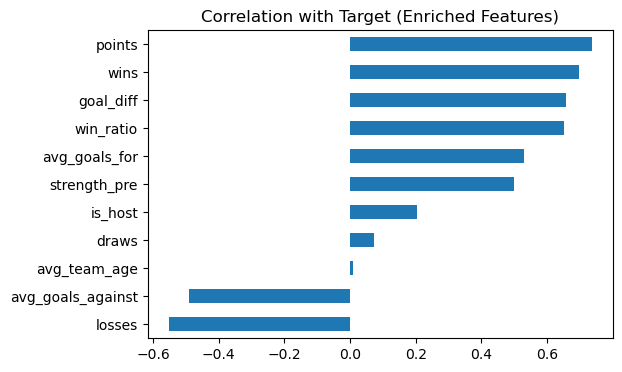

In [7]:
corr_enr = df[FEATURES_ENRICHED + ["y_ord"]].corr(numeric_only=True)["y_ord"]
corr_enr = corr_enr.drop("y_ord").sort_values()

corr_enr.plot(kind="barh", figsize=(6,4))
plt.title("Correlation with Target (Enriched Features)")
plt.show()

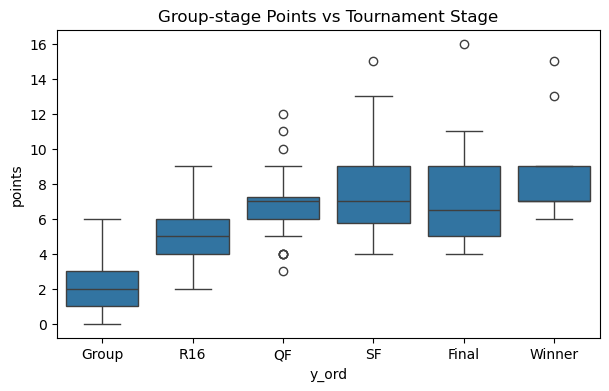

In [8]:
plt.figure(figsize=(7,4))
sns.boxplot(x="y_ord", y="points", data=df)
plt.xticks(range(6), LABELS)
plt.title("Group-stage Points vs Tournament Stage")
plt.show()

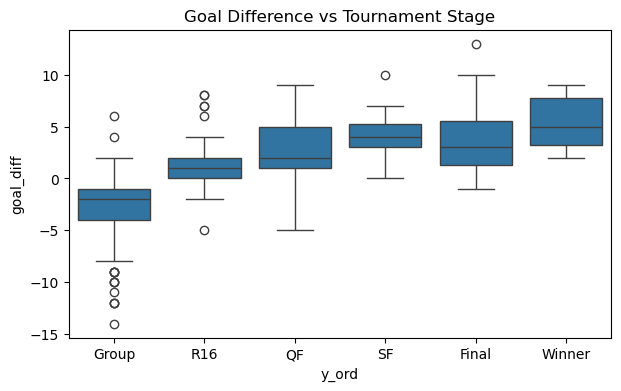

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot(x="y_ord", y="goal_diff", data=df)
plt.xticks(range(6), LABELS)
plt.title("Goal Difference vs Tournament Stage")
plt.show()

In [10]:
metrics = pd.read_csv(project_root / "results" / "metrics.csv")
metrics

,model,accuracy,macro_f1,weighted_f1
0,LogReg baseline,0.625000,0.345346,0.644521
1,LogReg enriched,0.593750,0.312067,0.635524
2,XGB baseline,0.640625,0.449234,0.663673
3,XGB enriched,0.625000,0.306514,0.636648


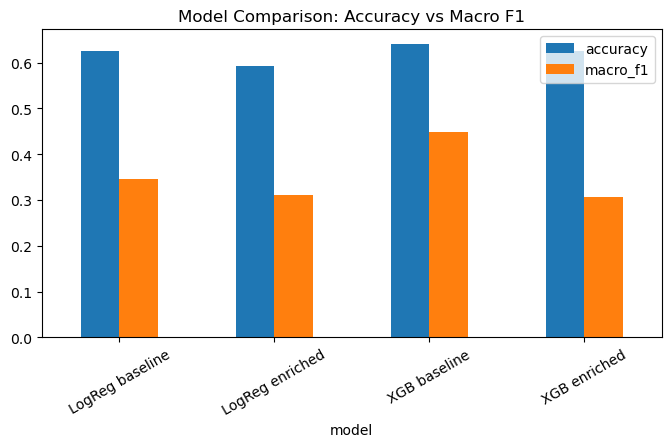

In [11]:
metrics_plot = metrics.set_index("model")[["accuracy", "macro_f1"]]

metrics_plot.plot(kind="bar", figsize=(8,4))
plt.title("Model Comparison: Accuracy vs Macro F1")
plt.xticks(rotation=30)
plt.show()


------------------------------------------------------------
XGB baseline
------------------------------------------------------------
Accuracy: 0.641
Macro F1 : 0.449

              precision    recall  f1-score   support

       Group      0.962     0.781     0.862        32
         R16      0.500     0.500     0.500        16
          QF      0.500     0.625     0.556         8
          SF      0.400     0.500     0.444         4
       Final      0.250     0.500     0.333         2
      Winner      0.000     0.000     0.000         2

    accuracy                          0.641        64
   macro avg      0.435     0.484     0.449        64
weighted avg      0.701     0.641     0.664        64



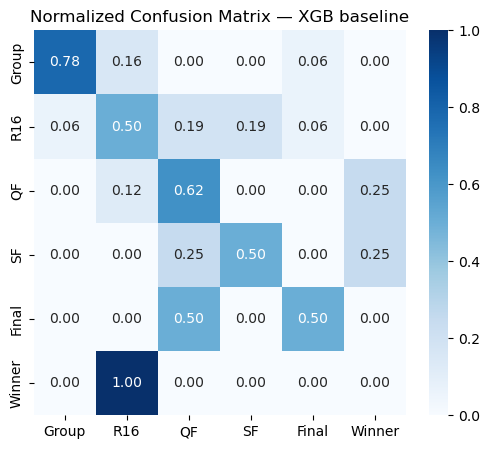

In [12]:
from src.models import train_xgb
from src.evaluation import evaluate_model

xgb_base = train_xgb(train_df, FEATURES_BASELINE)
res = evaluate_model(xgb_base, test_df, FEATURES_BASELINE, "XGB baseline")

cm = res["confusion_df"]
cm_norm = cm.div(cm.sum(axis=1), axis=0)

plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix — XGB baseline")
plt.show()